In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import kaepora as kpora
import kaepora_plot as kplot
import spectral_analysis as sa
import matplotlib.pyplot as plt
import composite

# Installing Kaepora v1.2

- Go to https://github.com/msiebert1/kaepora and create a new python 2.7 environment containing the list of prerequisite packages
- git clone https://github.com/msiebert1/kaepora.git
- Go to https://msiebert1.github.io/kaepora/ and download kaepora_v1.2.db to the kaepora/data/ directory
- Navigate to kaepora/src/ and open this notebook


# Query Kaepora for maximum-light Foundation spectra
- Bins have been chosen so the average spectra are well-matched in phase
- This example removes outlier spectra that do not pass our quality cuts

In [3]:
vel_queries_found = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'foundation' and Events.Foundation_vel >= -11.8 and Events.Av_25 > 0 and phase between -3 and 5 and filename != 'Foundation_asassn16la_phase=-2.739901715.txt' and filename != 'Foundation_2017cpu_phase=-1.61488826747.txt' and filename != 'Foundation_2017ckx_phase=-5.02466525823.txt' and filename != 'Foundation_asassn15np_phase=-1.63200650294.txt' and filename != 'Foundation_asassn16jf_phase=-6.05004316433.txt' and filename != 'Foundation_asassn15nr_phase=4.77672098892.txt' and filename != 'Foundation_2016gsu_phase=-2.009279776.txt' and Events.SN != 'ps16fbb'",
                     "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'foundation' and Events.Foundation_vel between -30 and -11.8 and Events.Av_25 > 0 and phase between -5 and 5 and filename != 'Foundation_2016cvv_phase=1.55477190182.txt'"]
composites_found, sn_arrays_found, og_sn_arrays_found, boot_sn_arrays_found = kpora.make_composite(vel_queries_found, boot=True, medmean=1, verbose=True, av_corr=True, shape_param='Foundation_x1',
                                                                         gini_balance=True, combine=True, get_og_arr=True, make_corr=True, scale_region=[5500,5700],
                                                                         db_file='../data/kaepora_v1.2.db')


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'foundation' and Events.Foundation_vel >= -11.8 and Events.Av_25 > 0 and phase between -3 and 5 and filename != 'Foundation_asassn16la_phase=-2.739901715.txt' and filename != 'Foundation_2017cpu_phase=-1.61488826747.txt' and filename != 'Foundation_2017ckx_phase=-5.02466525823.txt' and filename != 'Foundation_asassn15np_phase=-1.63200650294.txt' and filename != 'Foundation_asassn16jf_phase=-6.05004316433.txt' and filename != 'Foundation_asassn15nr_phase=4.77672098892.txt' and filename != 'Foundation_2016gsu_phase=-2.009279776.txt' and Events.SN != 'ps16fbb'
20 Total Spectra found
0 flagged spectra removed 20 spectra left
0 spectra of peculiar Ias removed 20 spectra left
20 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
20 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
asassn15il Found

# Plot the Foundation composite spectra

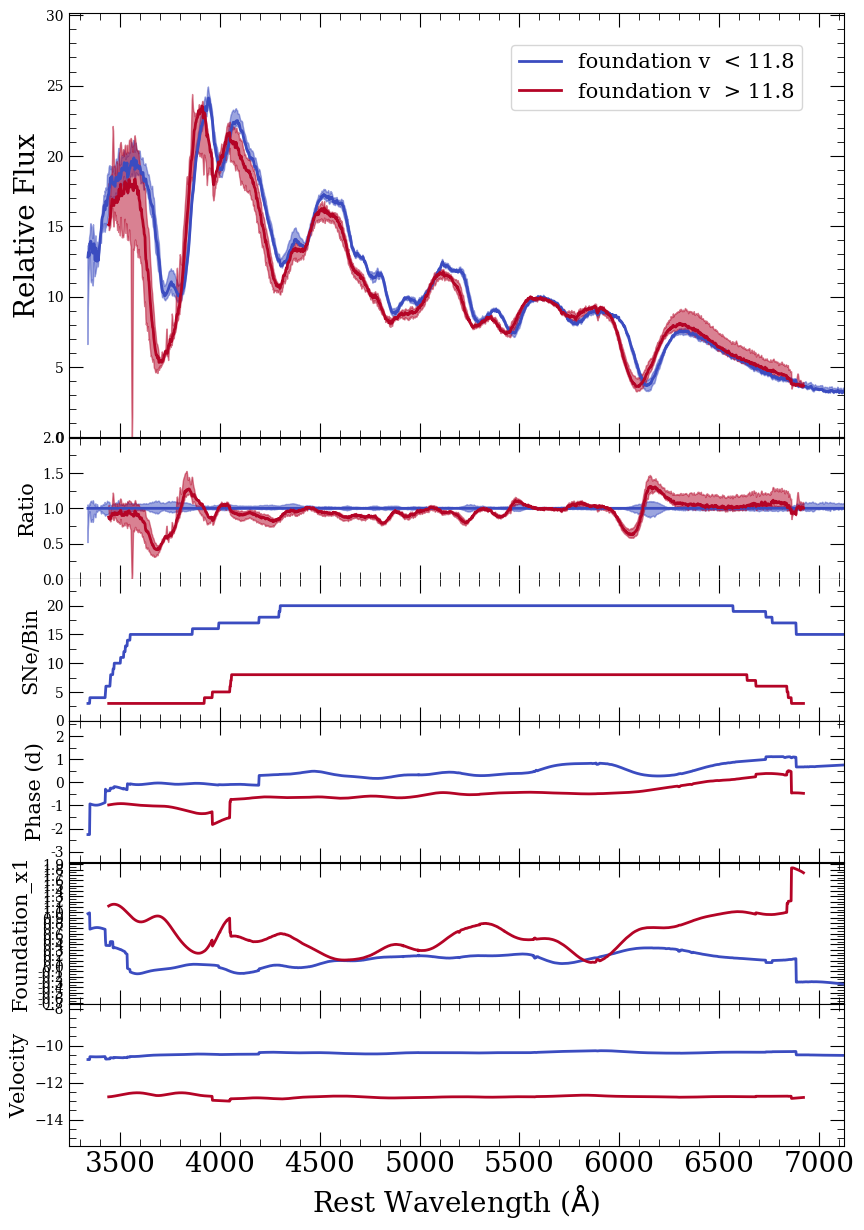

In [4]:
kpora.set_min_num_spec(composites_found, 3)
kplot.comparison_plot(composites_found, scale_type=False, min_num_show=3, extra=True, legend_labels = ['foundation v  < 11.8', 'foundation v  > 11.8'], scale_region = [5500, 5700], verbose=False)


# Query Kaepora for all maximum-light spectra
- Bins have been chosen to best match the phase and light-curve shape of the Foundation composite spectra
- Data have already been controlled for quality (Siebert et al. 2019)

In [11]:
kpora_queries = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -2 and 2 and ((dm15_source > 1. and dm15_source < 1.3) or (dm15_from_fits > 1. and dm15_from_fits < 1.3)) and (si_v0 >= -11800 and si_v0 <= -8500) and source != 'foundation'",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -2 and 2 and ((dm15_source > 1. and dm15_source < 1.3) or (dm15_from_fits > 1. and dm15_from_fits < 1.3)) and si_v0 < -11800 and source != 'foundation'"]

composites_kpora, sn_arrays_kpora, og_sn_arrays_kpora, boot_sn_arrays_kpora = kpora.make_composite(kpora_queries, boot=True, medmean=1, verbose=True, av_corr=True, shape_param='dm15',
                                                                         gini_balance=True, combine=True, get_og_arr=True, make_corr=True, scale_region=[5500,5700],
                                                                         db_file='../data/kaepora_v1.2.db')

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -2 and 2 and ((dm15_source > 1. and dm15_source < 1.3) or (dm15_from_fits > 1. and dm15_from_fits < 1.3)) and (si_v0 >= -11800 and si_v0 <= -8500) and source != 'foundation'
113 Total Spectra found
5 flagged spectra removed 108 spectra left
0 spectra of peculiar Ias removed 108 spectra left
106 spectra of SNe that have host reddening corrections
Arrays cleaned
106 spectra may have telluric contamination
40 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
2003cq_combined None bsnip 29.24168551641482 -1.1777927808608528 1.1999999999999997 3036.0 10064.0
2005ag_combined None bsnip 18.893755704106137 -0.6944911897764504 1.0465189775571149 3504.0 8566.0
2005cf_combined None uv 240.66851599168646 -0.7539310819849613 1.1 2090.0 10432.0
2002ck_combined None cfa 48.40933934923734 0.978993234468574 1.08 3616.0 7320.0
1996x_combined None other 425.55011

# Plot the Kaepora composite spectra

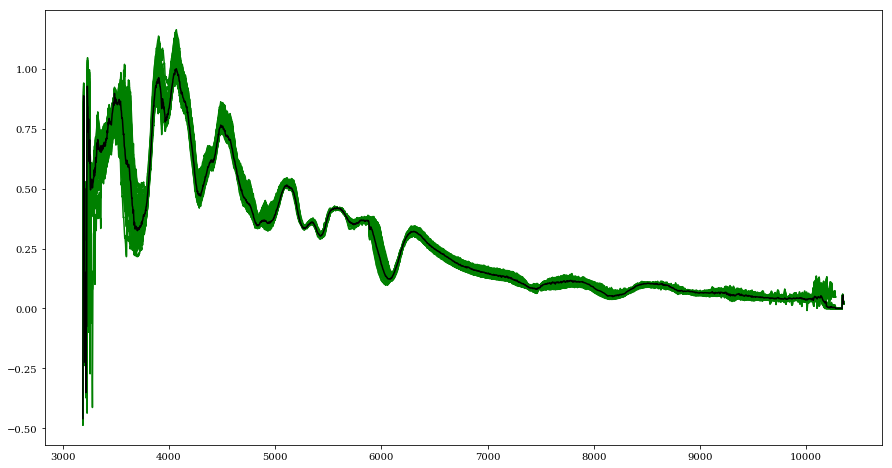

In [12]:
plt.figure(figsize = [15,8])
for b in boot_sn_arrays_kpora[1]:
    plt.plot(b.wavelength, b.flux, 'g')
plt.plot(composites_kpora[1].wavelength, composites_kpora[1].flux, 'k')
plt.show()

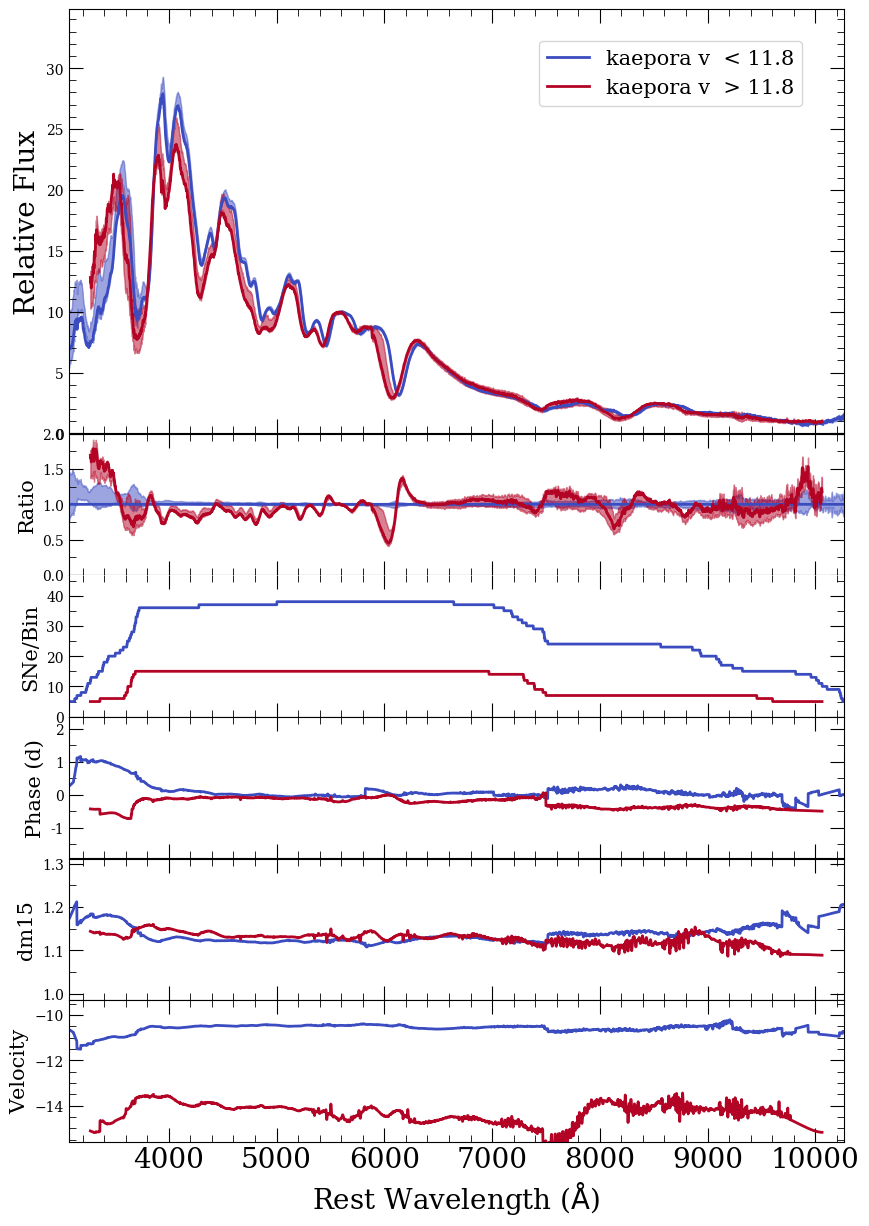

In [13]:
kpora.set_min_num_spec(composites_kpora, 5)
kplot.comparison_plot(composites_kpora, scale_type=False, min_num_show=5, extra=True, scale_region=[5500, 5700], legend_labels = ['kaepora v  < 11.8', 'kaepora v  > 11.8'], verbose=False)


In [7]:
x1s = []
for sn in sn_arrays_found[0]:
    x1s.append(sn.event_data['Foundation_x1'])

-0.18748806272293064


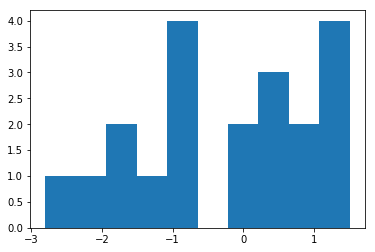

In [10]:
print np.average(x1s)
plt.hist(x1s)
plt.show()